In [51]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

In [4]:
data = load_diabetes()
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [8]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
df['target'] = data.target

In [13]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.15)

In [25]:
def get_cv_score(model,x,y):
    score = cross_val_score(model,x,y,scoring='r2')
    m = np.mean(score)
    s = np.std(score)
    print('mean score is :: ',m)
    print('std is :: ', s)
    

In [26]:
mdl1 = LinearRegression()
mdl1.fit(x_train,y_train)
get_cv_score(mdl1,x_train,y_train)

mean score is ::  0.48270512573849533
std is ::  0.10441032953328401


In [28]:
mdl1.coef_

array([ -26.21804097, -249.46404252,  538.79505598,  294.45766586,
       -878.91677973,  606.65690403,  100.24234623,  172.74232475,
        768.78431654,   68.20656502])

In [33]:
for a,b in enumerate(x_train.columns):
#     print(a,b)
    print(f"coef of {b} is :"+str(mdl1.coef_[a]))

coef of age is :-26.218040972774446
coef of sex is :-249.4640425206156
coef of bmi is :538.795055983932
coef of bp is :294.457665858845
coef of s1 is :-878.916779726687
coef of s2 is :606.656904028436
coef of s3 is :100.24234622941061
coef of s4 is :172.74232474650876
coef of s5 is :768.7843165447784
coef of s6 is :68.20656501920679


In [34]:
mdl1.intercept_

152.27322368611152

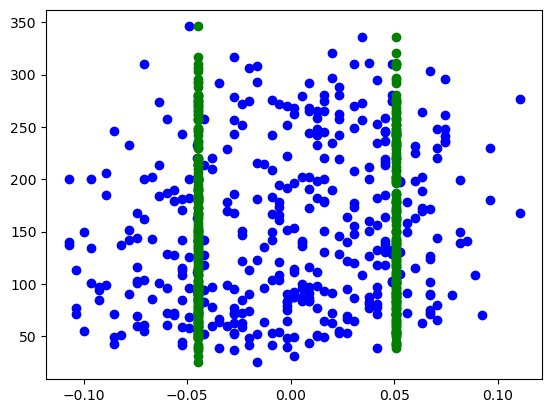

In [38]:
plt.scatter(x_train.age,y_train,color='blue')
plt.scatter(x_train.sex,y_train,color='green')

In [39]:
y_pred = mdl1.predict(x_test)

In [41]:
mean_squared_error(y_test,y_pred)

3350.226149990615

# Ridge

In [46]:
mdl2 = Ridge(alpha=1)
mdl2.fit(x_train,y_train)

get_cv_score(mdl2,x_train,y_train)

mean score is ::  0.4093322979137105
std is ::  0.04877058912232026


In [49]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
print(param_grid)

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [58]:
grid = GridSearchCV(mdl2,param_grid,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.4865468470521687
{'alpha': 0.1}


In [61]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.44244780137389095

In [62]:
ridge.intercept_

152.3311672979507

In [63]:
ridge.coef_

array([  -9.20801512, -207.66185303,  504.55200952,  270.05545337,
        -68.48653174,  -29.33388682, -215.98205929,  117.26118153,
        411.41499097,   88.0557965 ])

In [67]:
for a,b in enumerate(x_train.columns):
    print(f"coef of {b} is : "+str(ridge.coef_[a]))

coef of age is : -9.20801511804842
coef of sex is : -207.66185302561556
coef of bmi is : 504.55200951972205
coef of bp is : 270.05545336637306
coef of s1 is : -68.4865317444457
coef of s2 is : -29.333886824325536
coef of s3 is : -215.98205928747294
coef of s4 is : 117.26118152951365
coef of s5 is : 411.4149909688729
coef of s6 is : 88.05579649600584
